In [1]:
import pandas as pd
import numpy as np
%pylab inline
%load_ext sql
import yaml
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
//anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
connection_string = 'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds)

In [3]:
%sql $connection_string

'Connected: student@postgres'

In [4]:
cars_table = %sql SELECT * FROM cars;
cars = cars_table.DataFrame()

398 rows affected.


In [6]:
cars.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,index,mpg,cylinders,displacement,horsepower,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000
mean,198.500000,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090
std,115.036951,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689
min,0.000000,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,99.250000,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000
50%,198.500000,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000
75%,297.750000,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000
max,397.000000,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


In [16]:
cars.fillna('-')

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,0,18.0,8,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449.0,10.5,70,1,ford torino
5,5,15.0,8,429.0,198,4341.0,10.0,70,1,ford galaxie 500
6,6,14.0,8,454.0,220,4354.0,9.0,70,1,chevrolet impala
7,7,14.0,8,440.0,215,4312.0,8.5,70,1,plymouth fury iii
8,8,14.0,8,455.0,225,4425.0,10.0,70,1,pontiac catalina
9,9,15.0,8,390.0,190,3850.0,8.5,70,1,amc ambassador dpl


In [9]:
cars.head(7)

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11e0fef60>],
 'caps': [<matplotlib.lines.Line2D at 0x11e0efb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x11e0dbb38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11e0ea860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11e0fe588>,
  <matplotlib.lines.Line2D at 0x11e0f7198>]}

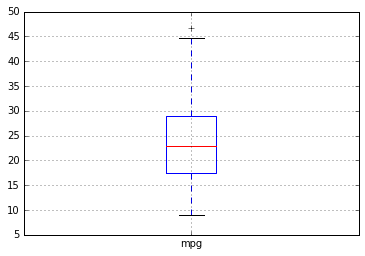

In [12]:
cars.boxplot('mpg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f887e10>]], dtype=object)

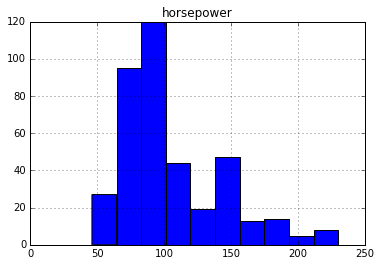

In [13]:
cars.hist('horsepower')

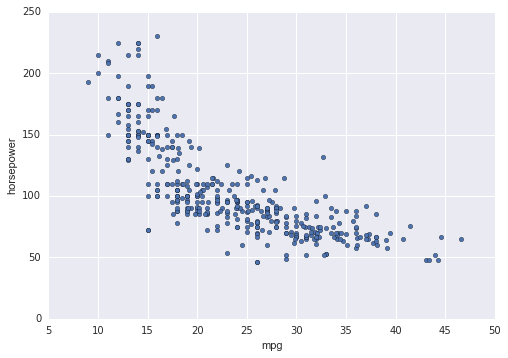

In [15]:
cars.plot.scatter(x='mpg',y='horsepower')